In [3]:
import numpy as np
import sympy as sp

x = np.array([[2,3],[4,1]])
y = np.array([1,-1])
a0, a1 = sp.symbols('a:2')
a = np.array([a0,a1])

# a0, a1, a2 = sp.symbols('a:3')
# a = np.array([a0, a1, a2])

b = sp.symbols('b')

In [4]:
def KernelLinear(xi,xj):
    import numpy as np
    return np.inner(xi,xj)

K = KernelLinear(x,x)
print K

[[13 11]
 [11 17]]


In [11]:
def getLd(a,y,x,xi):
    Ld1 = sum(a)-0.5*sumaayyk(a,y,x,xi)
    return Ld1

def sumaayyk(a,y,x,xi):
    import numpy as np
    _sumaayyk = np.array(sum(np.outer(a,a)*np.outer(y,y)*KernelLinear(x,xi)))
    return sum(_sumaayyk)

Ld1 = getLd(a,y,x,x)
print Ld1

-6.5*a0**2 + 11.0*a0*a1 + a0 - 8.5*a1**2 + a1


* $\sum \alpha y = 0$

In [9]:
print sum(a*y)

a0 - a1


In [13]:
Ld1_ = Ld1.subs(a0,a1)
sp.pprint(Ld1_)

              2       
- -4.0⋅(-1)⋅a₁  + 2⋅a₁


In [21]:
Ld2 = sp.diff(Ld1_,a1)
print Ld2

-8.0*a1 + 2


In [20]:
a_ = sp.solve(Ld2,a1)
print type(a_)
a_1 = a_[0]
print a_1

<type 'list'>
0.250000000000000


In [22]:
sol_a = [a_1,a_1]
print sol_a

[0.250000000000000, 0.250000000000000]


* $w=\sum_(i=0*N) \alpha yx$

In [30]:
def sumayx(alphas,y,x):
    ayxT = alphas*y*x.T
    return ayxT.sum(axis=1)

sol_w = sumayx(np.array(sol_a),y,x)
print sol_w

[-0.500000000000000 0.500000000000000]


$$
    \begin{aligned}
        \sum wx+b &=1 or -1\\
        y(\sum wx+b) &=1\\
        yb = 1 - y \sum xw\\
        b = y(1-y \sum wx)\\
    \end{aligned}
$$

In [36]:
for xi,yi in zip(x,y):
    b = yi*(1-yi*np.inner(sol_w,xi))
    print b, xi, yi

0.500000000000000 [2 3] 1
0.500000000000000 [4 1] -1


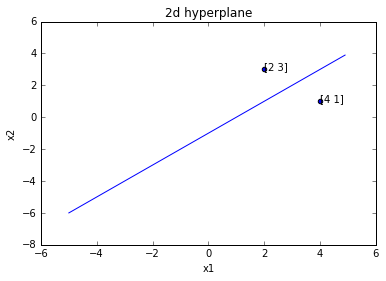

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x1=np.arange(-5,5,0.1)
x2=-(sol_w[0]*x1+b)/sol_w[1]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title('2d hyperplane')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
for i in x:
    ax.text(i[0],i[1],i)
    plt.scatter(i[0],i[1])
plt.plot(x1,x2)
#plt.scatter([0,4],[0,4])
plt.show()


In [4]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

dataArr, labelArr = loadDataSet('data/testSet.txt')
print labelArr

[-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [14]:
def selectJrand(i, m):
    j = i
    while j==i:
        j = int(random.uniform(0, m))  # uniform: select random number 0~m with same ratio
    return j

def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [12]:
from numpy import *

# 이 함수는 5개 인자 (데이터 집합, 분류 항목 표시, 상수 C, 오차 범위, 종료하기 전 최대 반복 횟수) 처리
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    # 1. 알파가 변경될 수 있다면 최적화 입력
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 2. 임의로 두 번째 알파 선택
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                # 3. 알파가 0과 C 사이의 값이 되도록 함
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print "L==H"; continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print "eta>=0"; continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                # 4. 반대쪽에 있는 j와 동일하게 계산된 값으로 i를 갱신
                if (abs(alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                # 5. 상수의 간격을 설정
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print "iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print "iteration number: %d" % iter
    return b,alphas

In [15]:
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

L==H
iter: 0 i:1, pairs changed 1
L==H
iter: 0 i:4, pairs changed 2
L==H
L==H
L==H
j not moving enough
L==H
iter: 0 i:14, pairs changed 3
iter: 0 i:17, pairs changed 4
j not moving enough
L==H
iter: 0 i:23, pairs changed 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:39, pairs changed 6
L==H
L==H
j not moving enough
iter: 0 i:67, pairs changed 7
iter: 0 i:69, pairs changed 8
j not moving enough
L==H
j not moving enough
L==H
iteration number: 0
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
iter: 0 i:35, pairs changed 1
iter: 0 i:39, pairs changed 2
iter: 0 i:52, pairs changed 3
L==H
L==H
iter: 0 i:62, pairs changed 4
iter: 0 i:67, pairs changed 5
iter: 0 i:69, pairs changed 6
j not moving enough
L==H
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving

In [17]:
print alphas, b

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.12964047]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.24066981]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.37031027]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     

In [18]:
import cvxopt as cvx


ImportError: No module named cvxopt